## Comparing Changes

### US/Canada level 1

In [1]:
import geoplanar
import geopandas as gpd
import numpy as np

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import sys
import os
sys.path.append(os.path.abspath('..'))
import libpysal

In [4]:
import pandas as pd

### Data Retrieval

In [7]:
npe = gpd.read_parquet("nonplanar_enforced.parquet") #non planar enforced data


In [8]:
pe = gpd.read_parquet("planar_enforced.parquet") # planar enforced


In [93]:
npe = npe.set_crs('epsg:3857')
pe= pe.set_crs('epsg:3857')

In [107]:
pe.columns

Index(['level_0', 'geometry', 'COUNTRY', 'index', 'AREA', 'PERIMETER',
       'STATE_', 'STATE_ID', 'STATE_NAME', 'STATE_FIPS', 'SUB_REGION',
       'STATE_ABBR', 'GID_0', 'NAME_0', 'GID_1', 'NAME_1', 'VARNAME_1',
       'NL_NAME_1', 'TYPE_1', 'ENGTYPE_1', 'CC_1', 'HASC_1', 'equals',
       'almost_equals', 'almost_equals_full', 'equals_exact'],
      dtype='object')

In [104]:
US = pe[pe['COUNTRY'].isin(['US'])]
CANADA= pe[pe['COUNTRY'].isin(['CANADA'])]

<AxesSubplot:>

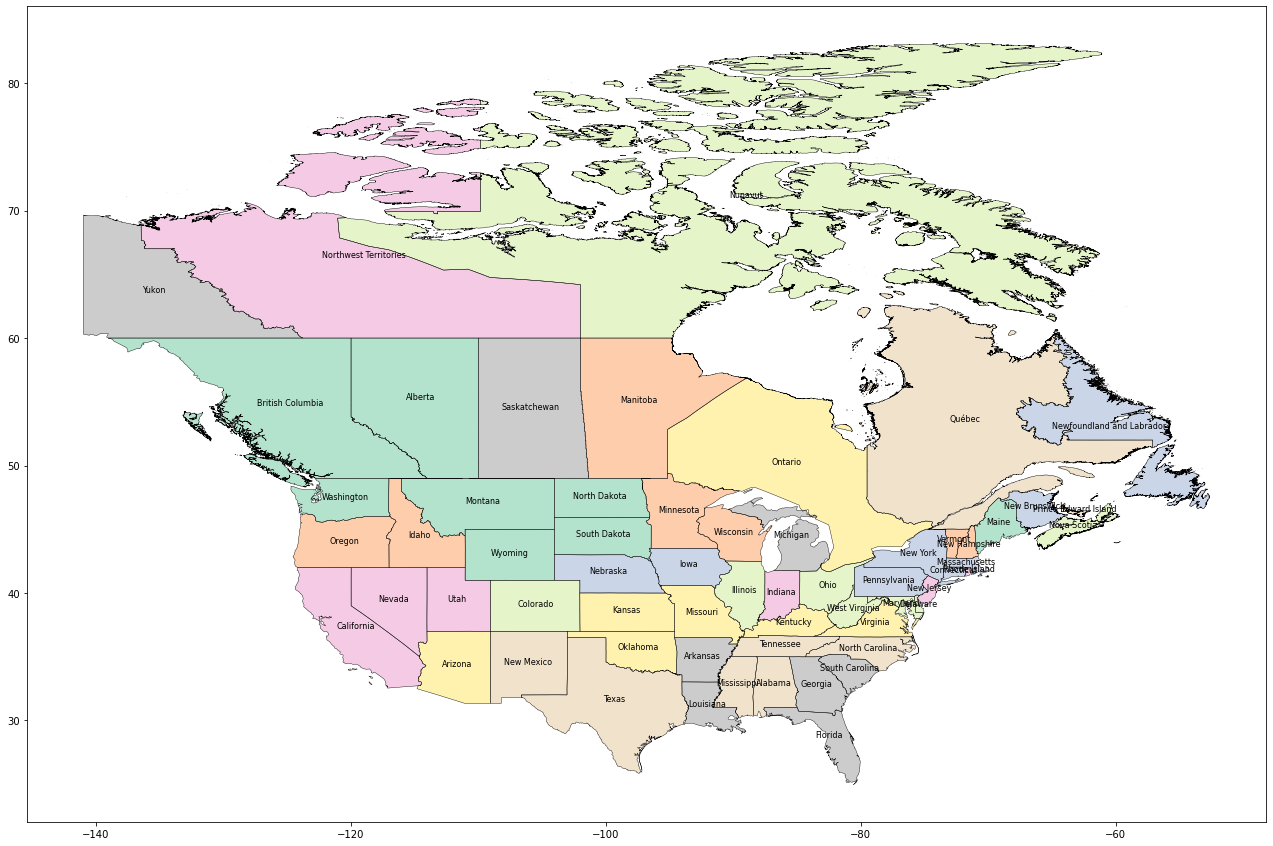

In [136]:
import matplotlib.pyplot as plt
fig = plt.figure(1, figsize=(25,15)) 
ax = fig.add_subplot()
US.apply(lambda x: ax.annotate(text=x['STATE_NAME'], xy=x.geometry.centroid.coords[0],  ha='center', fontsize=8),axis=1);
US.boundary.plot(ax=ax, color='Black', linewidth=.4)
US.plot(ax=ax, cmap='Pastel2', figsize=(12, 12))
CANADA.apply(lambda x: ax.annotate(text=x['NAME_1'], xy=x.geometry.centroid.coords[0],  ha='center', fontsize=8),axis=1);
CANADA.boundary.plot(ax=ax, color='Black', linewidth=.4)
CANADA.plot(ax=ax, cmap='Pastel2', figsize=(12, 12))


### Changes in Centroids 

In [95]:
npe_cen= npe.centroid # non planar enforced data
npe_cen.head()

0     POINT (-86.779 45.480)
1     POINT (-82.467 42.882)
2     POINT (-82.751 42.535)
3    POINT (-120.427 47.377)
4    POINT (-109.652 47.032)
dtype: geometry

In [97]:
pe_cen= pe.centroid #planar enforced data
pe_cen.head()

0     POINT (-86.779 45.480)
1     POINT (-82.467 42.882)
2     POINT (-82.751 42.535)
3    POINT (-120.427 47.377)
4    POINT (-109.652 47.032)
dtype: geometry

Text(-0.05, 0.5, 'Map of US and Canada')

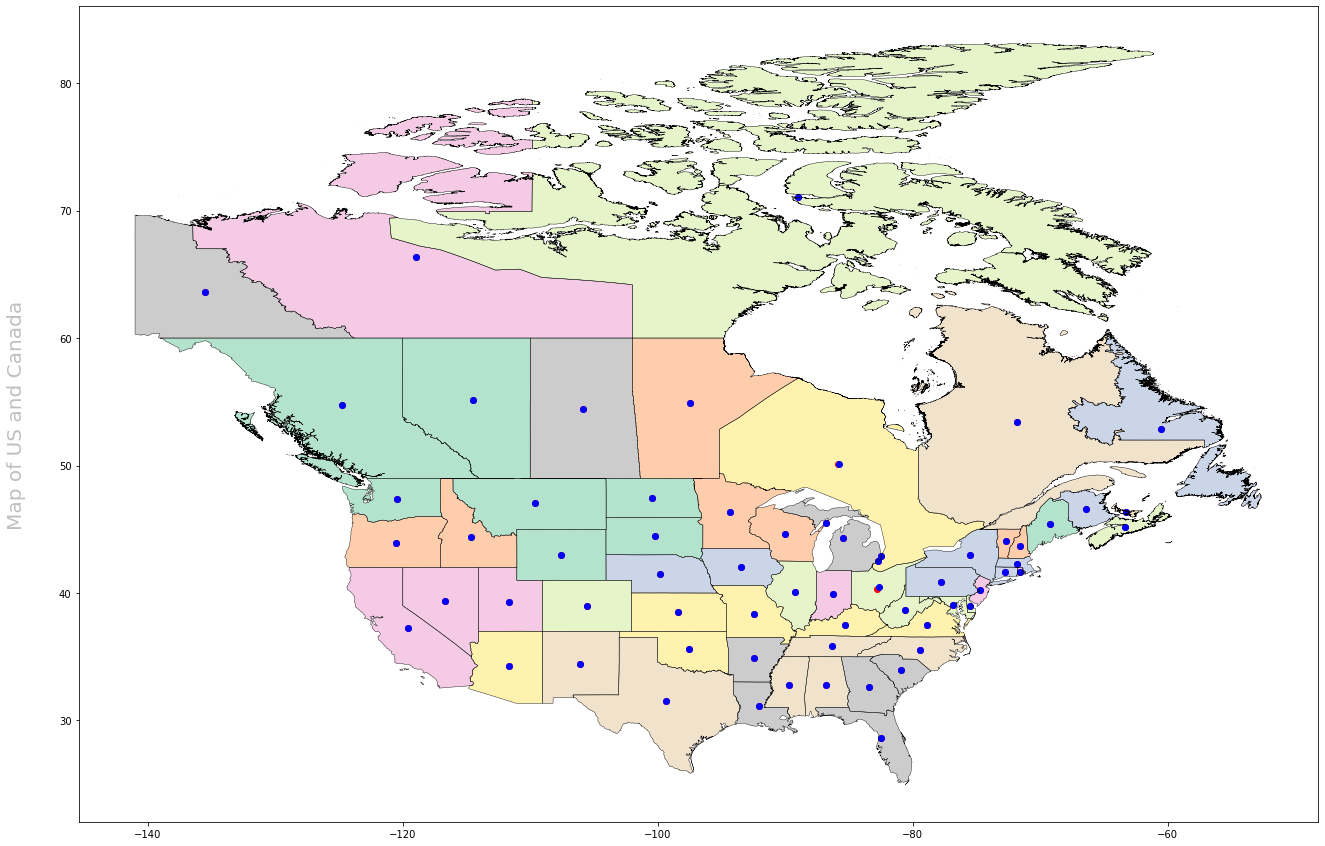

In [138]:
import matplotlib.pyplot as plt
fig = plt.figure(1, figsize=(25,15)) 
ax = fig.add_subplot()
US.boundary.plot(ax=ax, color='Black', linewidth=.4)
US.plot(ax=ax, cmap='Pastel2', figsize=(12, 12))
CANADA.boundary.plot(ax=ax, color='Black', linewidth=.4)
CANADA.plot(ax=ax, cmap='Pastel2', figsize=(12, 12))
npe_cen.plot(ax=ax, color='red') # centroid for non planar
pe_cen.plot(ax=ax, color='blue')# centroid for planar enforced data
ax.text(-0.05, 0.5, "Map of US and Canada", transform=ax.transAxes,
        fontsize=20, color='gray', alpha=0.5,
        ha='center', va='center', rotation='90')

### Subset for Ohio a Polygon

In [17]:
Ohio_npe = npe[npe.STATE_NAME=="Ohio"] 

In [18]:
Ohio_pe = pe[pe.STATE_NAME=="Ohio"] 

In [19]:
Ohio_pe.geometry

27    POLYGON ((-83.61846 38.67790, -83.63332 38.664...
Name: geometry, dtype: geometry

In [20]:
Ohio_npe.geometry

27    POLYGON ((-83.27285 38.60918, -83.29014 38.596...
Name: geometry, dtype: geometry

In [21]:
Ohio_pe_centroid= Ohio_pe.centroid
Ohio_npe_centroid= Ohio_npe.centroid


<AxesSubplot:>

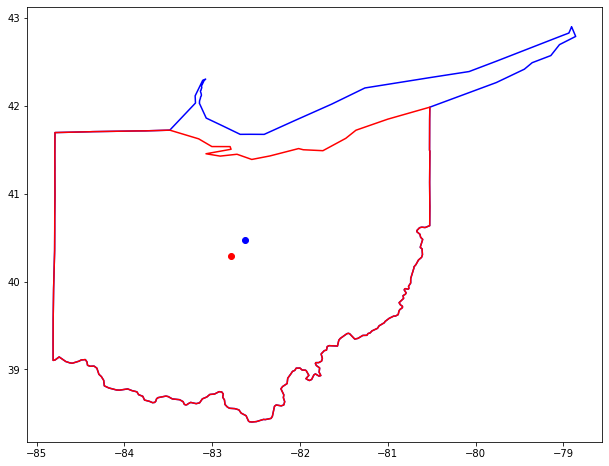

In [22]:
base =Ohio_pe.geometry.boundary.plot(edgecolor='blue', figsize=(15, 8))
Ohio_npe.geometry.boundary.plot(ax=base, color='red')
Ohio_npe_centroid.plot(ax=base, color='red')
Ohio_pe_centroid.plot(ax=base, color='blue')

## 1. Comparison of Centroids 

In [23]:
# geom_equals
pe['equals'] = npe_cen.geom_equals(pe_cen, align=False) 

# geom_almost_equals with 5 decimals
pe['almost_equals'] = npe_cen.geom_almost_equals(pe_cen, decimal=5)

#  geom_almost_equals with all of centroid decimals
pe['almost_equals_full'] = npe_cen.geom_almost_equals(pe_cen, decimal=14)

# geom_equals_exact with .00001 tolerance
pe['equals_exact'] = npe_cen.geom_equals_exact(pe_cen, tolerance=.00001, align=False)

In [25]:
pe.head()

,level_0,geometry,COUNTRY,index,AREA,PERIMETER,STATE_,STATE_ID,STATE_NAME,STATE_FIPS,...,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,equals,almost_equals,almost_equals_full,equals_exact
0,60,"POLYGON ((-89.39987 47.98665, -89.34513 47.971...",LAKE,NaN,NaN,NaN,NaN,NaN,None,None,...,None,None,None,None,None,None,False,True,False,True
1,64,"POLYGON ((-82.46070 42.90598, -82.46270 42.895...",LAKE,NaN,NaN,NaN,NaN,NaN,None,None,...,None,None,None,None,None,None,True,True,True,True
2,65,"POLYGON ((-82.92947 42.36300, -82.87499 42.458...",LAKE,NaN,NaN,NaN,NaN,NaN,None,None,...,None,None,None,None,None,None,True,True,True,True
3,0,"MULTIPOLYGON (((-122.45316 48.12867, -122.3600...",US,0.0,20.750,34.956,1.0,1.0,Washington,53,...,None,None,None,None,None,None,False,False,False,False
4,1,"POLYGON ((-111.45853 44.53800, -111.48178 44.5...",US,1.0,45.132,34.527,2.0,2.0,Montana,30,...,None,None,None,None,None,None,False,True,False,True


### Centroids Geometries Equals 

In [24]:
pe.groupby(['equals']).size()

equals
False    50
True     14
dtype: int64

Text(-0.05, 0.5, 'Map of US and Canada Geometries Equal')

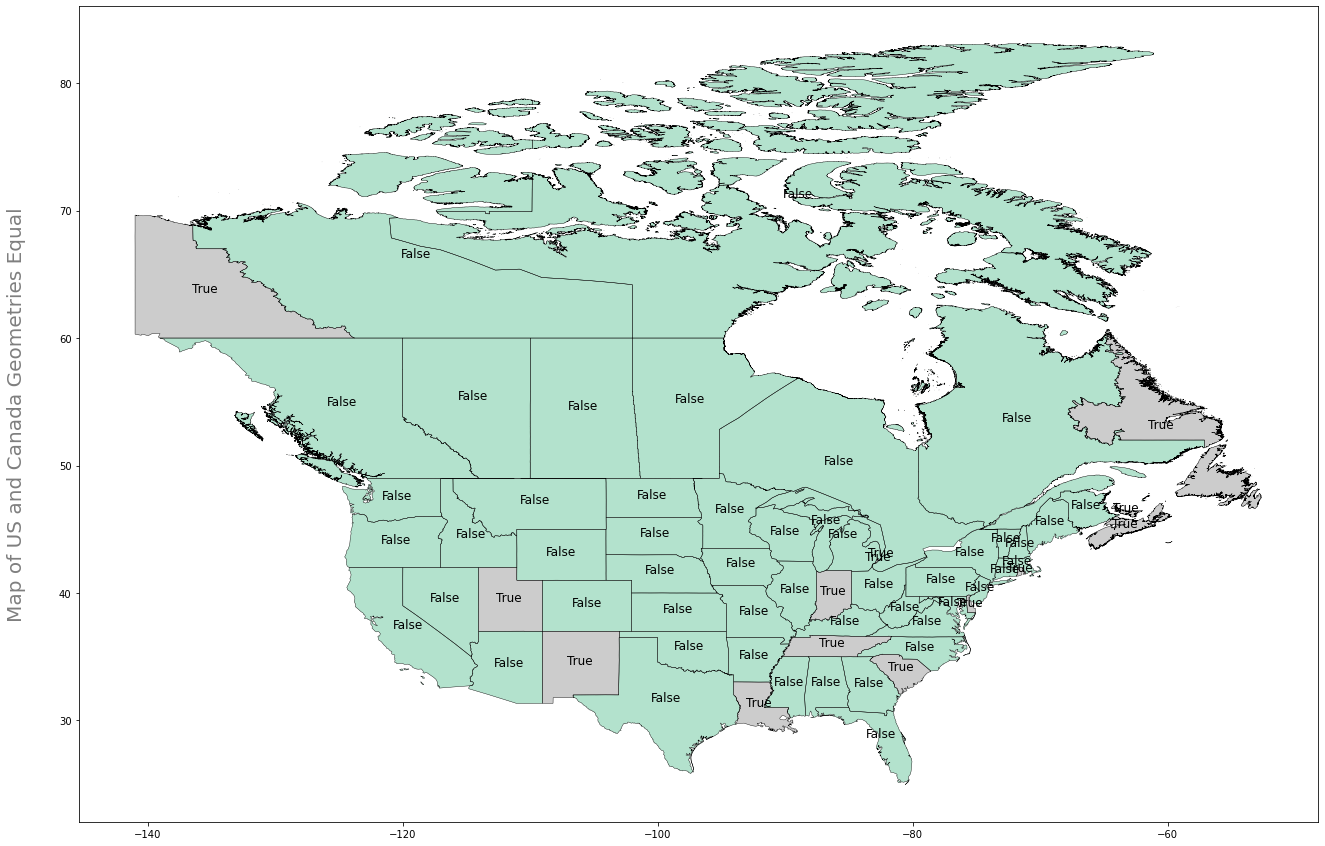

In [224]:

fig = plt.figure(1, figsize=(25,15)) 
ax = fig.add_subplot()
pe.apply(lambda x: ax.annotate(text=x['equals'], xy=x.geometry.centroid.coords[0],  ha='center', fontsize=12),axis=1);
pe.boundary.plot(ax=ax, color='Black', linewidth=.4)
pe.plot(ax=ax,column='equals', cmap='Pastel2', figsize=(12, 12))
ax.text(-0.05, 0.5, "Map of US and Canada Geometries Equal", transform=ax.transAxes,
        fontsize=20, color='black', alpha=0.5,
        ha='center', va='center', rotation='90')

### Centroids Geometries Almost Equals 

In [27]:
pe.groupby(['almost_equals']).size()

almost_equals
False    14
True     50
dtype: int64

Text(-0.05, 0.5, 'Map of US and Canada Geoms Almost Equal')

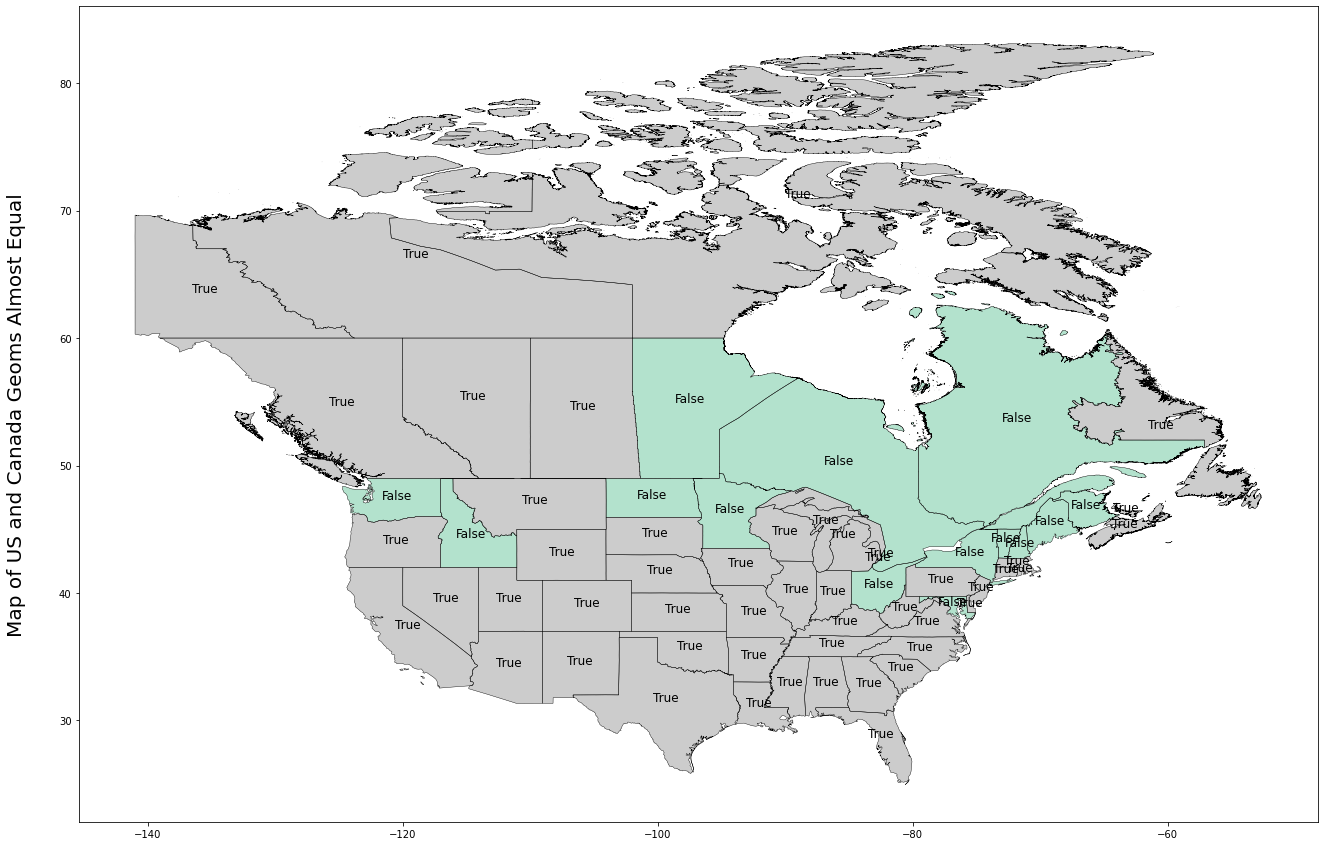

In [222]:

fig = plt.figure(1, figsize=(25,15)) 
ax = fig.add_subplot()
pe.apply(lambda x: ax.annotate(text=x['almost_equals'], xy=x.geometry.centroid.coords[0],  ha='center', fontsize=12),axis=1);
pe.boundary.plot(ax=ax, color='Black', linewidth=.4)
pe.plot(ax=ax,column='almost_equals', cmap='Pastel2', figsize=(12, 12))
ax.text(-0.05, 0.5, "Map of US and Canada Geoms Almost Equal", transform=ax.transAxes,
        fontsize=20, color='black', alpha=1,
        ha='center', va='center', rotation='90')

### Centroids Geometries Almost Equals Full

In [28]:
pe.groupby(['almost_equals_full']).size()

almost_equals_full
False    50
True     14
dtype: int64

Text(-0.05, 0.5, 'Map of US and Canada Geoms Almost Equal Full ')

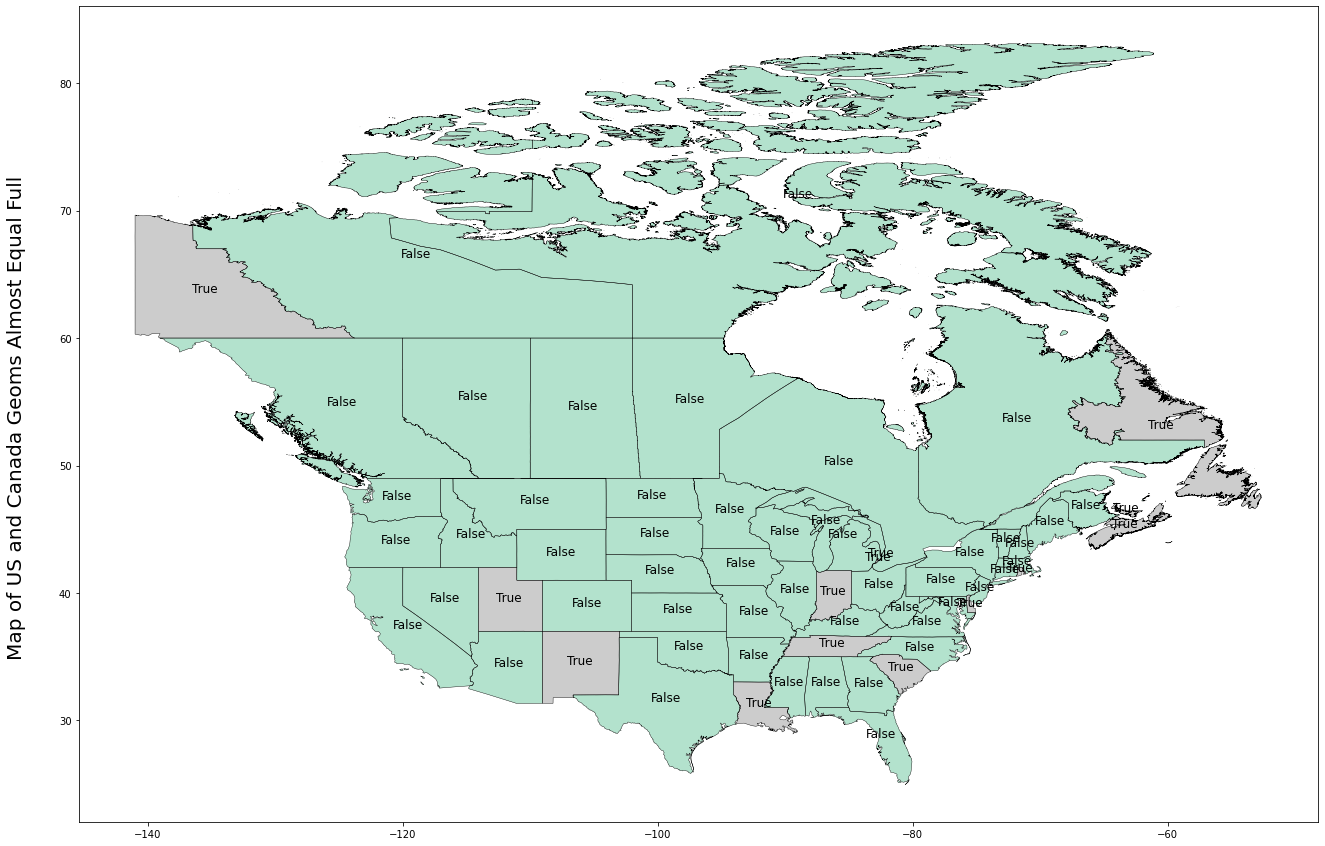

In [223]:

fig = plt.figure(1, figsize=(25,15)) 
ax = fig.add_subplot()
pe.apply(lambda x: ax.annotate(text=x['almost_equals_full'], xy=x.geometry.centroid.coords[0],  ha='center', fontsize=12),axis=1);
pe.boundary.plot(ax=ax, color='Black', linewidth=.4)
pe.plot(ax=ax, column='almost_equals_full', cmap='Pastel2', figsize=(12, 12))
ax.text(-0.05, 0.5, "Map of US and Canada Geoms Almost Equal Full ", transform=ax.transAxes,
        fontsize=20, color='black', alpha=1,
        ha='center', va='center', rotation='90')

### Centroids Geometries Almost Exact

In [29]:
pe.groupby(['equals_exact']).size()

equals_exact
False    14
True     50
dtype: int64

Text(-0.05, 0.5, 'Map of US and Canada Geometries Equals Exact ')

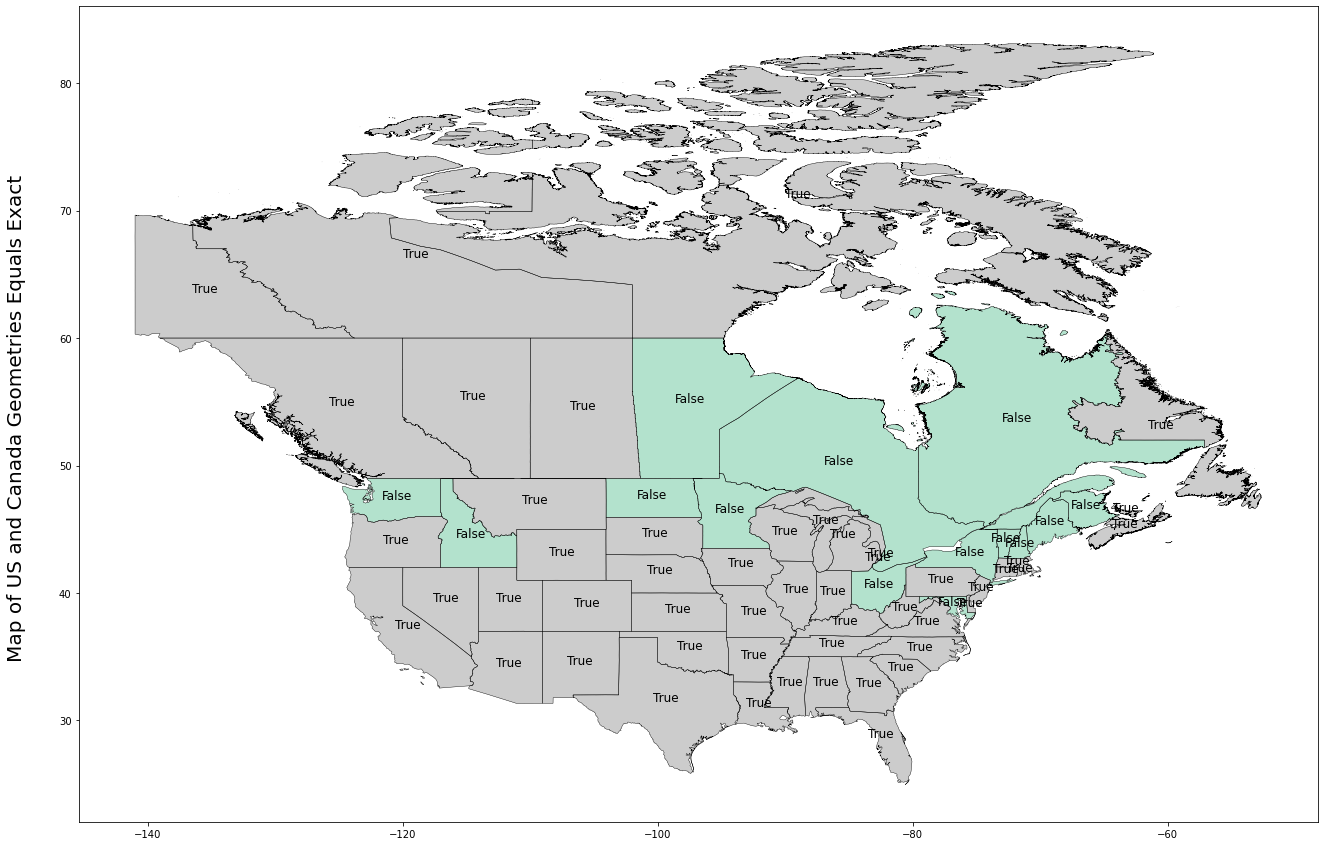

In [220]:

fig = plt.figure(1, figsize=(25,15)) 
ax = fig.add_subplot()
pe.apply(lambda x: ax.annotate(text=x['equals_exact'], xy=x.geometry.centroid.coords[0],  ha='center', fontsize=12),axis=1);
pe.boundary.plot(ax=ax, color='Black', linewidth=.4)
pe.plot(ax=ax,column='equals_exact', cmap='Pastel2', figsize=(12, 12))
ax.text(-0.05, 0.5, "Map of US and Canada Geometries Equals Exact ", transform=ax.transAxes,
        fontsize=20, color='black', alpha=1,
        ha='center', va='center', rotation='90')

Based on the type of specifications we get different results.

## 2. Comparison of Area


- Check all areas before and after geoplanar
- Compare /Contrast
- Explicitly state which ones changed

In [37]:
non_planar_enforced_area = npe
planar_enforced_area = pe

In [38]:
non_planar_enforced_area = non_planar_enforced_area.set_crs('epsg:3857')
planar_enforced_area= planar_enforced_area.set_crs('epsg:3857')

In [198]:
non_planar_enforced_area["area"] = non_planar_enforced_area['geometry'].area.round(decimals = 3)

In [202]:
planar_enforced_area["area"] = planar_enforced_area['geometry'].area.round(decimals = 3)

In [227]:
planar_enforced_area.columns

Index(['level_0', 'geometry', 'COUNTRY', 'index', 'AREA', 'PERIMETER',
       'STATE_', 'STATE_ID', 'STATE_NAME', 'STATE_FIPS', 'SUB_REGION',
       'STATE_ABBR', 'GID_0', 'NAME_0', 'GID_1', 'NAME_1', 'VARNAME_1',
       'NL_NAME_1', 'TYPE_1', 'ENGTYPE_1', 'CC_1', 'HASC_1', 'equals',
       'almost_equals', 'almost_equals_full', 'equals_exact', 'area',
       'coords'],
      dtype='object')

#### Ploting the areas for non planar enforced data

Text(-0.05, 0.5, 'Non Planar Enforced Areas ')

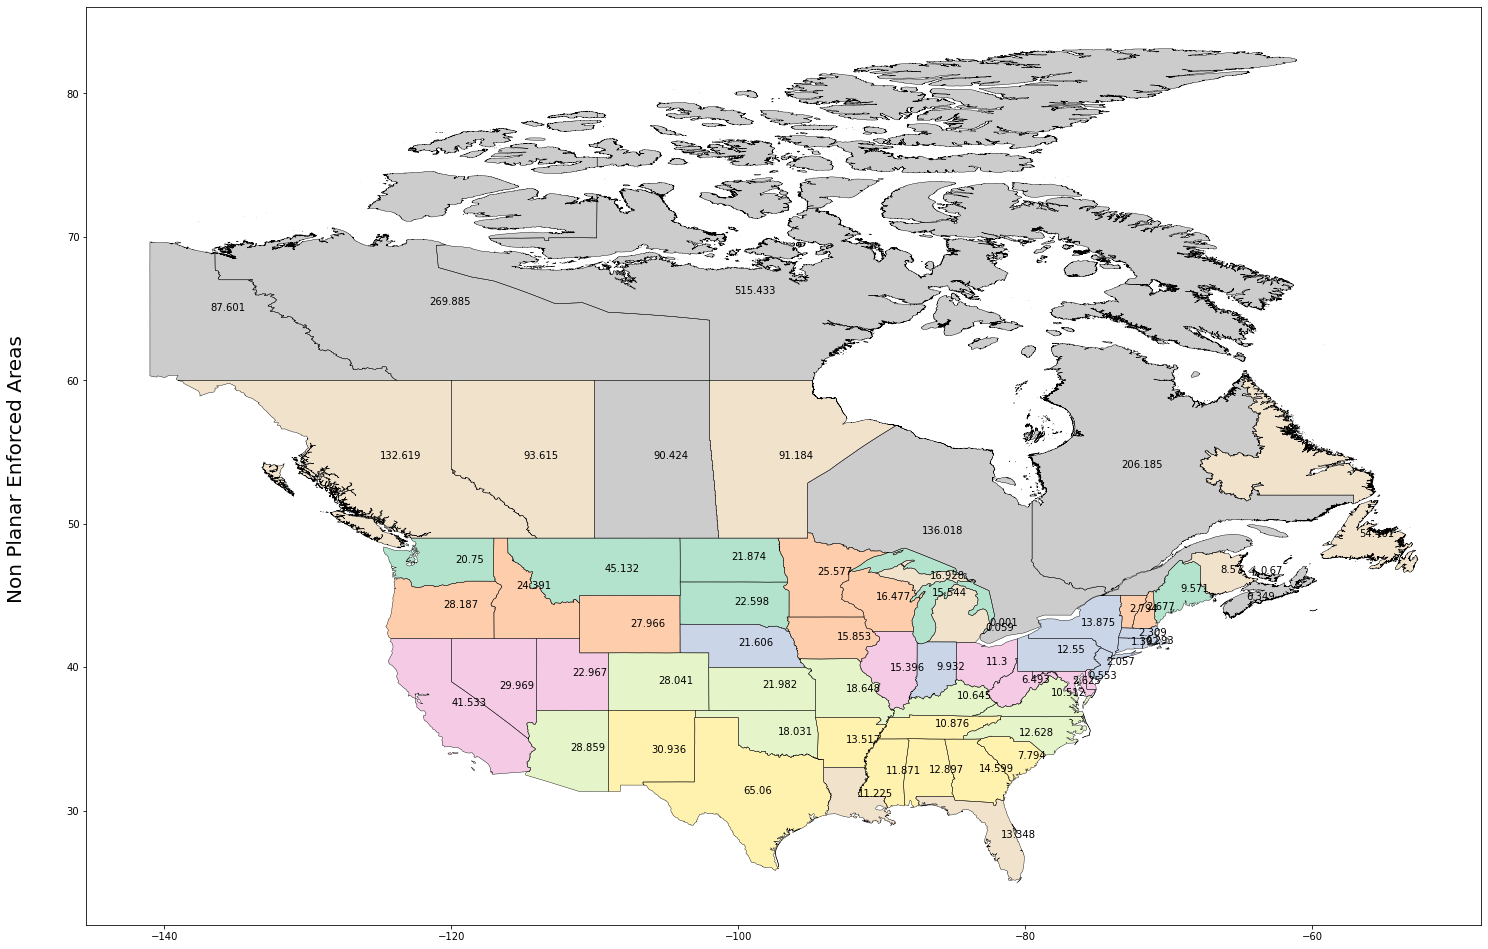

In [228]:

non_planar_enforced_area['coords'] = non_planar_enforced_area['geometry'].apply(lambda x: x.representative_point().coords[:])
non_planar_enforced_area['coords'] = [coords[0] for coords in non_planar_enforced_area['coords']]
fig, ax = plt.subplots(figsize = (25,20))

non_planar_enforced_area.plot(ax=ax, cmap='Pastel2', figsize=(12, 12))
non_planar_enforced_area.boundary.plot(ax=ax, color='Black', linewidth=.4)
                              
for idx, row in non_planar_enforced_area.iterrows():
   plt.annotate(text=row['area'], xy=row['coords'] )
ax.text(-0.05, 0.5, "Non Planar Enforced Areas ", transform=ax.transAxes,
        fontsize=20, color='black', alpha=1,
        ha='center', va='center', rotation='90')

#### Ploting the areas for planar enforced data

Text(-0.05, 0.5, 'Planar Enforced Areas ')

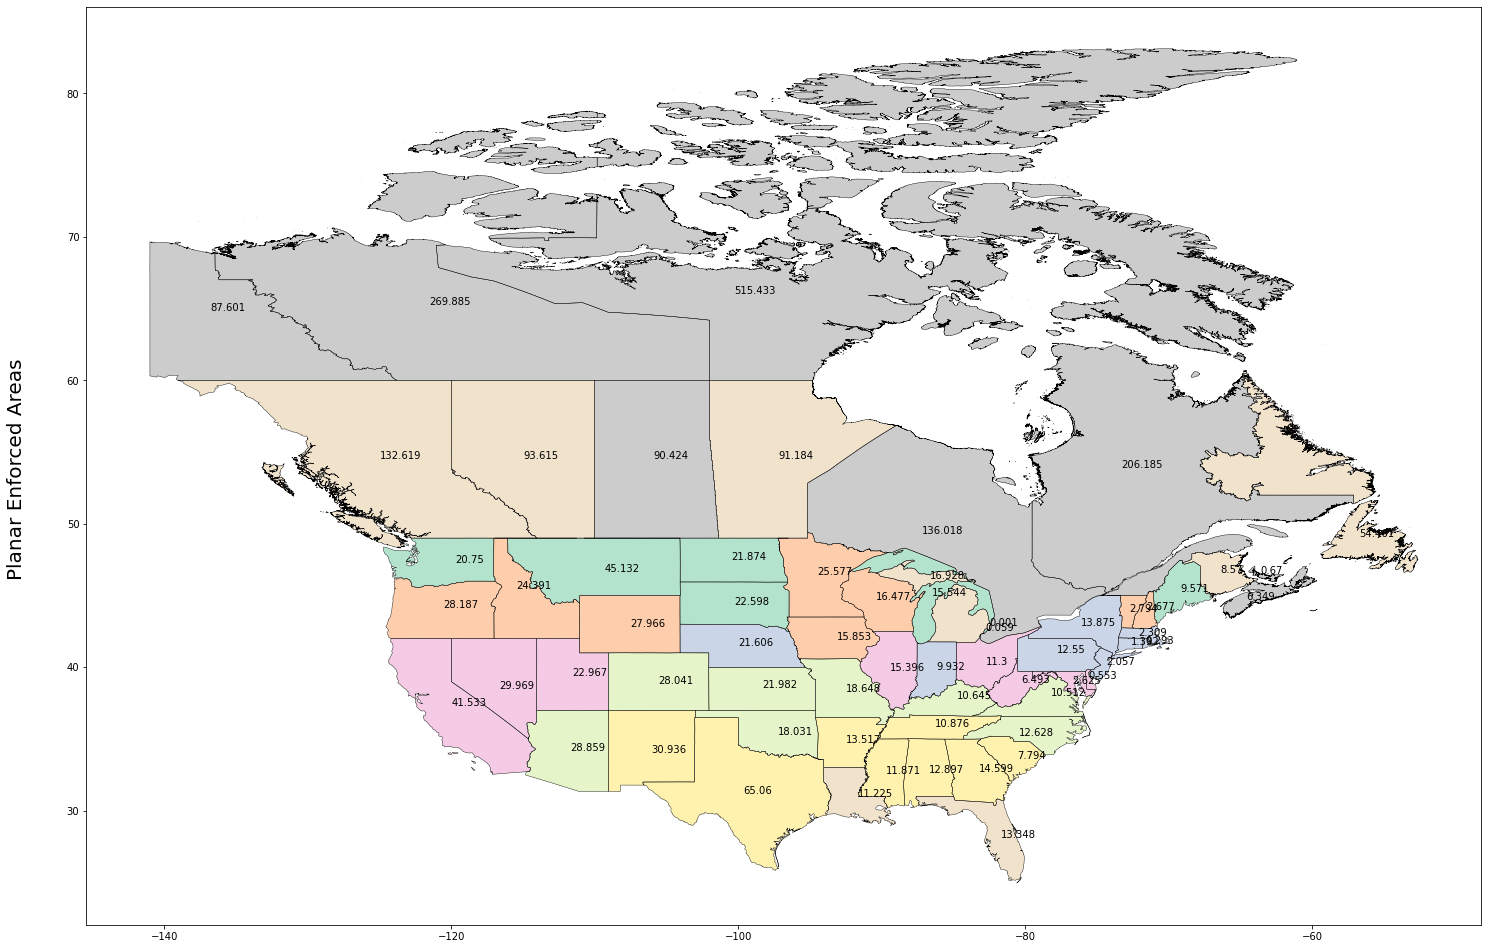

In [216]:

planar_enforced_area['coords'] = non_planar_enforced_area['geometry'].apply(lambda x: x.representative_point().coords[:])
planar_enforced_area['coords'] = [coords[0] for coords in non_planar_enforced_area['coords']]
fig, ax = plt.subplots(figsize = (25,20))

planar_enforced_area.plot(ax=ax, cmap='Pastel2', figsize=(12, 12))
planar_enforced_area.boundary.plot(ax=ax, color='Black', linewidth=.4)
                              
for idx, row in non_planar_enforced_area.iterrows():
   plt.annotate(text=row['area'], xy=row['coords'])
ax.text(-0.05, 0.5, "Planar Enforced Areas ", transform=ax.transAxes,
        fontsize=20, color='black', alpha=1,
        ha='center', va='center', rotation='90')

### Looking at the areas for each Polygon

In [201]:
print(non_planar_enforced_area.area)

0      15.543974
1       0.000533
2       0.058636
3      20.749831
4      45.131677
         ...    
59    136.017824
60      0.670316
61    206.184961
62     90.424490
63     87.600875
Length: 64, dtype: float64


In [41]:
planar_enforced_area["area"] = planar_enforced_area['geometry'].area

In [63]:
print(planar_enforced_area.area)

0      15.543974
1       0.000533
2       0.058636
3      20.750731
4      45.131687
         ...    
59    136.010019
60      0.670316
61    206.177792
62     90.424490
63     87.600875
Length: 64, dtype: float64


In [43]:
planar_enforced_area['area'].isin(non_planar_enforced_area['area']).value_counts()

True     43
False    21
Name: area, dtype: int64

## Putting the areas into a separate dataframe

In [47]:
data = planar_enforced_area.area
df = pd.DataFrame(data , columns = ['planar enforced area'])

In [48]:
df

,planar enforced area
0,15.543974
1,0.000533
2,0.058636
3,20.750731
4,45.131687
...,...
59,136.010019
60,0.670316
61,206.177792
62,90.424490


In [50]:
df["non planar enforced area"]= non_planar_enforced_area.area

In [154]:
df['difference'] = df['non planar enforced area'] - df['planar enforced area']

In [156]:
df.tail(60)

,planar enforced area,non planar enforced area,C2,C3,C4,C5,difference
4,45.131687,45.131677,0,0,0,0,-9.660331e-06
5,9.583503,9.570609,0,0,0,0,-1.289357e-02
6,21.878359,21.874287,0,0,0,0,-4.072578e-03
7,22.597691,22.597691,0,1,1,1,0.000000e+00
8,27.965642,27.965642,0,1,1,1,0.000000e+00
9,16.477302,16.477302,0,1,1,1,0.000000e+00
10,24.392654,24.390738,0,0,0,0,-1.916662e-03
11,2.804467,2.794098,0,0,0,0,-1.036905e-02
12,25.609552,25.576939,0,0,0,0,-3.261319e-02
13,28.187026,28.187026,0,1,1,1,0.000000e+00


In [64]:
# testing for equality
df['C2'] = df['planar enforced area'].equals(df['non planar enforced area']).astype(int) # 0 is false

df['C3'] = np.where((df['planar enforced area'] == df['non planar enforced area']),1,0)

def fun(row):
    if row['planar enforced area'] == row['non planar enforced area']:
        return 1
    else:
        return 0
df['C4'] = df.apply(fun, axis=1)

df['C5'] = df.apply(lambda x : 1 if x['planar enforced area'] == x['non planar enforced area'] else 0, axis=1)


In [ ]:
df.tail(20)

,planar enforced area,non planar enforced area,C2,C3,C4,C5
44,11.870990,11.870990,0,1,1,1
45,14.598796,14.598796,0,1,1,1
46,7.794397,7.794397,0,1,1,1
47,13.517338,13.517338,0,1,1,1
48,11.224646,11.224646,0,1,1,1
49,13.347713,13.347713,0,1,1,1
50,16.927959,16.927959,0,1,1,1
51,93.614624,93.614624,0,0,0,0
52,132.618869,132.618886,0,0,0,0
53,91.183156,91.184485,0,0,0,0


In [157]:
df2 = df[df.C5 == 0]

In [158]:
df2.shape

(21, 7)

In [159]:
df2.head(21)

,planar enforced area,non planar enforced area,C2,C3,C4,C5,difference
0,15.543974,15.543974,0,0,0,0,-7.105427e-15
3,20.750731,20.749831,0,0,0,0,-8.999905e-04
4,45.131687,45.131677,0,0,0,0,-9.660331e-06
5,9.583503,9.570609,0,0,0,0,-1.289357e-02
6,21.878359,21.874287,0,0,0,0,-4.072578e-03
10,24.392654,24.390738,0,0,0,0,-1.916662e-03
11,2.804467,2.794098,0,0,0,0,-1.036905e-02
12,25.609552,25.576939,0,0,0,0,-3.261319e-02
14,2.679751,2.677289,0,0,0,0,-2.461385e-03
18,13.887322,13.874597,0,0,0,0,-1.272436e-02


Here we can see the changes in the areas 